## **Part I**: 

>### Import Libraries and Connect with the dataset

In [1]:
import numpy as np
import pandas as pd
import keras
import keras.backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import Sequence
from keras.layers import *
import matplotlib.pyplot as plt
from google.colab import files
import io 
from google.colab import drive

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Projects 2021/Open Asteroid Dataset/Asteroid_Updated.csv"
df_asteroid = pd.read_csv(path)

In [4]:
df_asteroid.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


## **Part II**: 

>### Handling the missing values by cleaning the dataset, and using imputation

In [5]:
df_null = pd.DataFrame(np.round(100*df_asteroid.isnull().sum()/df_asteroid.shape[0],4))
df_null

,0
name,97.3840
a,0.0002
e,0.0000
i,0.0000
om,0.0000
w,0.0000
q,0.0000
ad,0.0007
per_y,0.0001
data_arc,1.8428


In [6]:
df_asteroid['diameter']=pd.to_numeric(df_asteroid['diameter'],errors='coerce')
dropindexes = df_asteroid['diameter'][df_asteroid['diameter'].isnull()].index
dropped_df = df_asteroid.loc[dropindexes]
df_asteroid = df_asteroid.drop(dropindexes, axis=0)
More_Na = df_asteroid.columns[df_asteroid.isna().sum()/df_asteroid.shape[0] > 0.5]
df_asteroid = df_asteroid.drop(More_Na, axis=1)
df_asteroid = df_asteroid.drop(['condition_code', 'neo', 'pha', 'albedo', 'H', 'class'],axis=1)
df_asteroid = df_asteroid.fillna(df_asteroid.mean())

In [7]:
df_asteroid.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,diameter,moid,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,939.400,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,545.000,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,246.596,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,525.400,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,106.699,1.09589,0.238632,1508.600458,282.366289


In [8]:
df_asteroid = df_asteroid.fillna(df_asteroid.mean())
df_asteroid.isnull().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
diameter      0
moid          0
n             0
per           0
ma            0
dtype: int64

In [9]:
df_asteroid['diameter'] = df_asteroid['diameter'].apply(np.log)

for column in df_asteroid.columns.drop(['diameter']):
    df_asteroid['log('+column+')'] = df_asteroid[column].apply(np.log)

In [10]:
df_asteroid.corr()['diameter'].abs().sort_values(ascending=False)

diameter           1.000000
log(a)             0.563616
log(per_y)         0.563616
log(n)             0.563616
log(per)           0.563616
log(q)             0.543737
log(moid)          0.528689
n                  0.525392
q                  0.522404
moid               0.521095
data_arc           0.519390
n_obs_used         0.511250
log(ad)            0.477252
log(n_obs_used)    0.433656
log(data_arc)      0.298793
a                  0.195634
e                  0.185047
log(e)             0.157921
ad                 0.112606
i                  0.096037
log(i)             0.088749
per_y              0.046649
per                0.046649
ma                 0.030946
log(ma)            0.023154
log(w)             0.006008
w                  0.005310
om                 0.001478
log(om)            0.000169
Name: diameter, dtype: float64

## **Part III**: 

>### Splitting the dataframe into train and test dataframes and normalizing them for our regressions.

In [11]:
from sklearn.model_selection import train_test_split

predictors = df_asteroid.drop('diameter',axis=1) 
target = df_asteroid['diameter']

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [12]:
X_train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,moid,n,per,ma,log(a),log(e),log(i),log(om),log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(moid),log(n),log(per),log(ma)
474961,3.148871,0.130545,14.123745,20.870476,335.017941,2.737801,3.559942,5.587796,5812.0,72,1.74091,0.176389,2040.942568,171.197625,1.147044,-2.036035,2.647857,3.038336,5.814184,1.007155,1.269744,1.720585,8.667680,4.276666,0.554408,-1.735063,7.621167,5.142819
283914,3.104229,0.169382,19.711359,107.671134,182.187629,2.578429,3.630030,5.469390,6824.0,186,1.56154,0.180208,1997.694859,177.806839,1.132766,-1.775599,2.981195,4.679082,5.205037,0.947180,1.289241,1.699167,8.828201,5.225747,0.445673,-1.713645,7.599749,5.180698
241049,3.170379,0.104378,1.607302,151.293279,138.910748,2.839460,3.501298,5.645143,6684.0,272,1.82279,0.174597,2061.888649,153.747173,1.153851,-2.259734,0.474557,5.019220,4.933832,1.043614,1.253134,1.730796,8.807472,5.605802,0.600368,-1.745274,7.631378,5.035310
359366,3.123361,0.232180,13.565848,54.472085,258.745939,2.398180,3.848542,5.520031,7120.0,185,1.42886,0.178554,2016.191342,323.992520,1.138910,-1.460244,2.607555,3.997688,5.555847,0.874710,1.347694,1.708383,8.870663,5.220356,0.356877,-1.722862,7.608966,5.780720
110551,2.646488,0.191386,13.100536,39.183682,344.363064,2.139987,3.152990,4.305397,6660.0,711,1.14667,0.228928,1572.546205,77.728902,0.973234,-1.653462,2.572653,3.668260,5.841697,0.760800,1.148351,1.459869,8.803875,6.566672,0.136862,-1.474347,7.360451,4.353227


In [13]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_train_norm = scaler(X_train)
X_test_norm = scaler(X_test)

def inverse_scaler(X):
    x_norm_arr= std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

##**Part IV:**  

>### Trying different regressions and ranking them according to their $𝑅^2$.

#### Algorithms used: 
- Linear Regression
- Elastic Net
- k-Nearest Neighbours
- Decision Tree
- Random Forest
- SVM
- Neural Network
- XGBoost.

In [14]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(Y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test,prediction, c='orange',label='predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated $\log(radius)$')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale
def score(prediction):
    score = r2_score(prediction,Y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))
algorithms = []
scores = []

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = score(Y_pred_lr)
announce(score_lr)
algorithms.append('LR')
scores.append(score_lr)

The R^2 score achieved using this regression is: 0.67


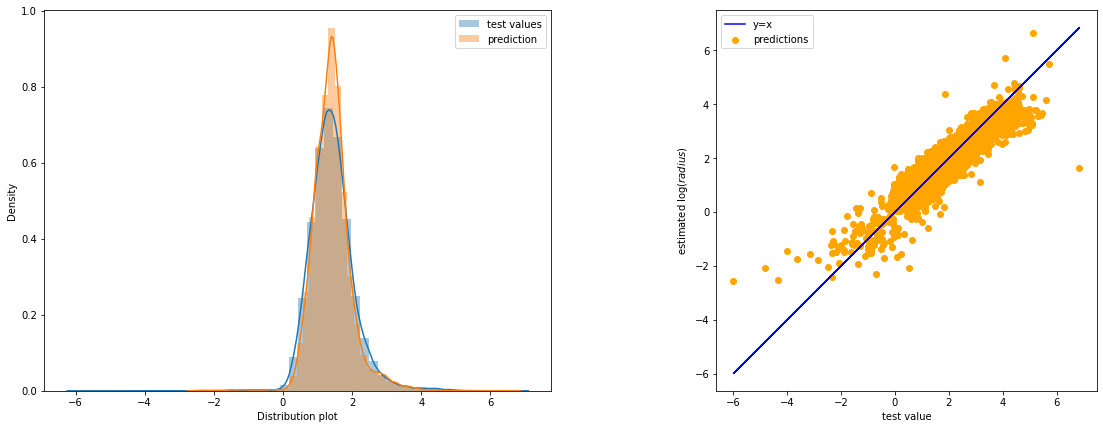

In [16]:
plot(Y_pred_lr)

### Elastic Net

In [17]:
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(cv=9,max_iter=10000)
enet.fit(X_train_norm,np.ravel(Y_train))
Y_pred_enet = enet.predict(X_test_norm)
score_enet = score(Y_pred_enet)
announce(score_enet)
algorithms.append('eNet')
scores.append(score_enet)

The R^2 score achieved using this regression is: 0.628


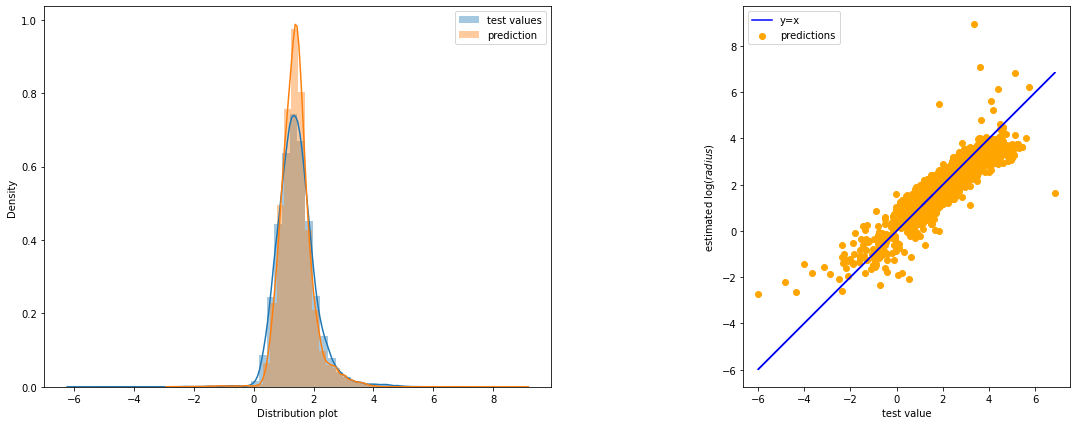

In [18]:
plot(Y_pred_enet)